In [26]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
help(iris)



Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      __dir__() -> list
 |      default dir() implementation
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


In [27]:
iris.filename

'/usr/local/anaconda/lib/python3.6/site-packages/sklearn/datasets/data/iris.csv'

In [28]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
# Train a Logistic Regression Model

import numpy as np

# to detect Iris-Virginica type based on the petal width features

X=iris["data"][:,3:] # petal width
y=(iris["target"]==2).astype(np.int) # returns 1 if Iris-Virginica else 0

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
log_reg.predict([[1.0]])

array([0])

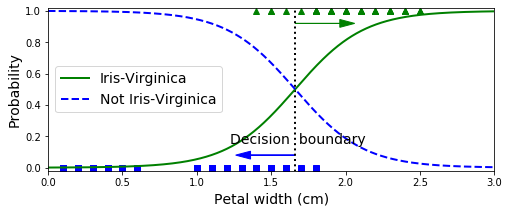

In [33]:
# Model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

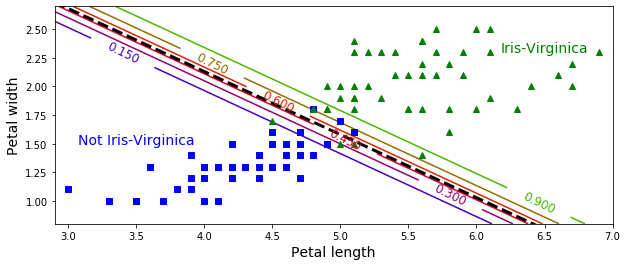

In [34]:
# Train a Logistic Regression model
# To detect the Iris-Virginica type based on the petal width and length features

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

# The numpy. meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. Meshgrid function is somewhat inspired from MATLAB. ... meshgrid function returns two 2-Dimensional arrays representing the X and Y coordinates of all the points.

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [35]:
decision_boundary

array([1.66066066])

In [36]:
# Softmax Regression

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
y_pred=softmax_reg.predict(X)
confusion_matrix(y,y_pred)

array([[97,  3],
       [ 2, 48]])

In [38]:
x1.ravel()

array([0.8, 0.8, 0.8, ..., 2.7, 2.7, 2.7])

Decision Trees
Decision tree can perform both classification and regression tasks and even multioutput tasks.
They are very powerful alogorithms capable of fitting complex datasets.

In [39]:
# Training and visualizing a Decision Tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [40]:
# Decision Tree classifier

X = iris.data[:, 2:] # considering only the petal length and petal width as the features
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
x1=X.shape
y1=iris.target.shape
print("X shape :" ,x1)
print("y Shape :",y1)

X shape : (150, 2)
y Shape : (150,)


Visualizing our decision tree
(using export_graphviz)

In [42]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)

Now we can use the following command to convert our .dot file to the required format.

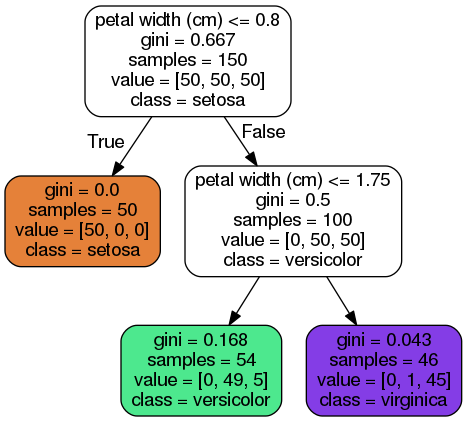

In [43]:
!dot -Tpng iris_tree.dot -o iris_tree.png
from IPython.display import Image
Image(filename='iris_tree.png')

Making Prediction

How does the Decision Tree Classifier make predictions ?

To make a prediction the decison classifier follows these steps :

Start at the root node (depth 0, at the top), this node asks whether the flower’s petal length is smaller than 2.45 cm:
                If it is, then you move down to the root’s left child node (depth 1, left).  In this case it is a leaf node hence the flower is predicted as setosa.
If it is not, then you move down to the root’s right child node (depth 1, right), since it is not a leaf node it asks further questions as, is the petal width smaller than 1.75 cm?
If it is, then your flower is most likely an Iris- Versicolor (depth 2, left).
If it is not, If not, it is likely an Iris-Virginica (depth 2, right).


A node's value attribute tells youhow many training instances of each class this node applies to: e.g. - the bottom right node applies to 0 Iris-Setosa,1-Iris-Virginica and 45 Iris-Virginica.

Gini Impurity

A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.
For example, since the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0.
The formula for finding the gini impurity score of a particular level is :

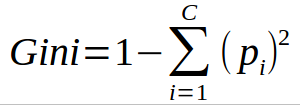
Here pi is the ratio of class i in the node whose gini index is being calculated. There are total of c classes.
In the above example the depth-2 left node has a gini score equal to 1 – (0/54)2 – (49/54)2 – (5/54)2 ≈ 0.168.

Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class k. To this -

It first traverses the tree to find the leaf node for this instance
Then it returns the ratio of training instances of class k in this node
Considering an Example

For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide.

The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris- Virginica (5/54).

And of course if you ask it to predict the class, it should output Iris-Versicolor (class 1) since it has the highest probability. Let’s check this:

In [45]:
# a petal length of 5 and petal width of 1.5
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [46]:
# a petal length of 2.45 and petal width of 1
tree_clf.predict_proba([[2.45,1]])

array([[0.        , 0.90740741, 0.09259259]])

In [47]:
tree_clf.predict([[5,1.5]])

array([1])

In [48]:
iris['data'].shape

(150, 4)

In [49]:
tree_clf.predict([[5,1.5],[3,1.5]])

array([1, 1])

The CART Training Algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees)

The idea is really quite simple:

First split the training set in two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”).

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub- subsets and so on, recursively.

It stops recursing once

It reaches the maximum depth (defined by the max_depth hyperparameter)
Or if it cannot find a split that will reduce impurity.
A few other hyperparameters control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).

How does it choose the best pair of k and tk?

It searches for the pair (k, tk) that produces the purest subsets (weighted by their size).
The cost function that the algorithm tries to minimize is given by


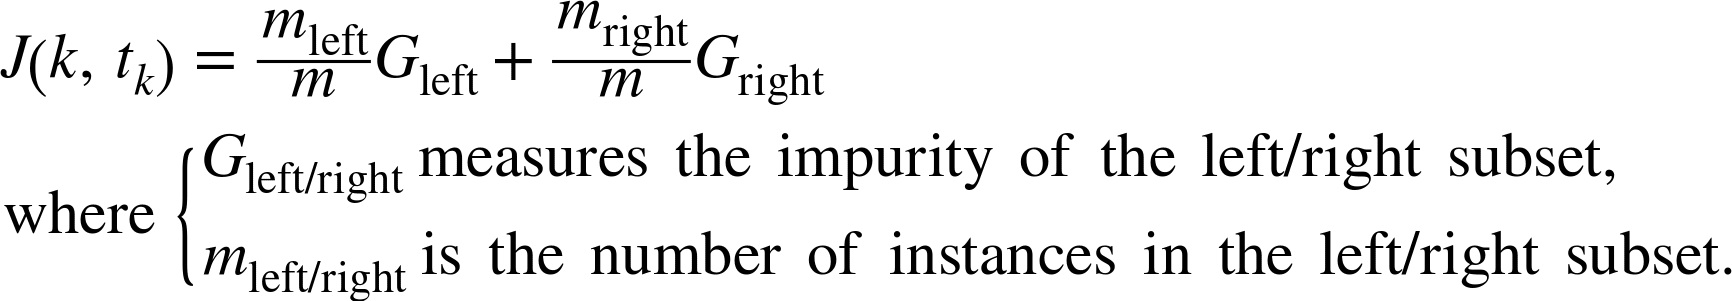

About the Cart Algorithm

It is a greedy algorithm as it greedily searches for an optimum split at the top level
Then repeats the process at each level.
It does not check whether or not the split will lead to the lowest possible impurity several levels down.
A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

So should you use Gini impurity or entropy?

The truth is, most of the time it does not make a big difference: they lead to similar trees.

Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

Regularization of Hyperparameter

Decision Trees make very few assumptions about the training data as opposed to linear models, which obviously assume that the data is linear, for example.

If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it.

Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.

In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree.

Regularization parameters for DecisionTreeClassifier class

max_depth → restrict the maximum depth of the Decision Tree
min_samples_split → the minimum number of samples a node must have before it can be split
min_samples_leaf → the minimum number of samples a leaf node must have
min_weight_fraction_leaf → same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
max_leaf_nodes → maximum number of leaf nodes
max_features → maximum number of features that are evaluated for splitting at each node
Increasing min_* hyperparameters or *reducing max_ ** hyperparameters will regularize the model.